In [2]:
using Reactive, Interact

In [3]:
using PyPlot

In [4]:
# matplotlib parameters
matplotlib["rcParams"][:update](["axes.labelsize" => 22,
                                 "axes.titlesize" => 20,
                                 "font.size" => 18,
                                 "legend.fontsize" => 14,
                                 "axes.linewidth" => 1.5,
                                 "font.family" => "serif",
                                 "font.serif" => "Computer Modern Roman",
                                 "xtick.labelsize" => 20,
                                 "xtick.major.size" => 5.5,
                                 "xtick.major.width" => 1.5,
                                 "ytick.labelsize" => 20,
                                 "ytick.major.size" => 5.5,
                                 "ytick.major.width" => 1.5,
                                 "text.usetex" => true,
                                 "figure.autolayout" => true])

In [5]:
import BP

In [6]:
#reload("BP")

In [7]:
δpmp(n₀::Int,m₀::Int) = BP.δpmp(45; n0=n₀, m0=m₀)
gausspmp(n₀::Int,m₀::Int) = BP.gausspmp(45; σ=1., n0=n₀, m0=m₀)

gausspmp (generic function with 1 method)

In [8]:
const ν = linspace(-3.45,-2.47,981);
const P = gausspmp(5,5);
@time sp = BP.Spectrum(ν,P);

elapsed time: 29.238365144 seconds (3131167044 bytes allocated, 9.72% gc time)


In [10]:
#full plot range, both in x and y
const xm = [-div(sp.N-1,2):div(sp.N-1,2)]

#zoom in :)
const edge = 10
const st = findin(xm, -edge)[1]
const en = findin(xm, edge)[1];

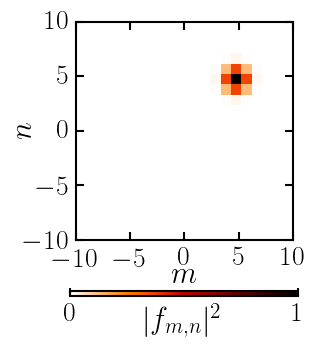

In [11]:
f, ax = plt.subplots(figsize=(3.5, 3.5))
im = ax[:imshow](reshape(abs2(P), sp.N,sp.N)[st:en,st:en], origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[-edge, edge, -edge, edge],
                 vmin=0, vmax=1)

ax[:set_ylabel](L"$n$", labelpad=-10)
ax[:set_xlabel](L"$m$", labelpad=-6)
    
cbaxes = f[:add_axes]([0.25, 0.08, 0.65, 0.015])
cbar = f[:colorbar](im, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([0, 1])
cbar[:set_ticklabels]([L"$0$", L"$1$"])
cbar[:set_label](L"$|f_{m,n}|^2$", rotation=0, labelpad=-15, y=0.5)
cbar[:solids][:set_edgecolor]("face")

In [12]:
sω = slider(ν[1]:0.002:ν[end], label="ω")

Slider{Float64}([Input{Float64}] -2.96,"ω",-2.96,-3.45:0.002:-2.47)

In [13]:
#plot spectrum
f1, ax1 = plt.subplots(figsize=(10, 4))
lift(ω -> withfig(()->begin
    ax1[:cla]()
    ax1[:plot](sp.νs,sp.intensity,"k") 
    ax1[:axvline](x=ω,color="k",ls="dashed")
    ax1[:set_xlim](sp.νs[1],sp.νs[end])
    ax1[:set_xlabel](L"$\omega_0 [J]$")
    ax1[:set_ylabel](L"$\sum_{m,n} |a_{m,n}|^2$ [a.u.]")
    end,f1,clear=false), sω)

PyError: PyError (:PyObject_Call) <class 'AttributeError'>
AttributeError("'Text' object has no attribute '_transform'",)
  File "/usr/lib/python3.4/site-packages/matplotlib/backend_bases.py", line 2158, in print_figure
    **kwargs)
  File "/usr/lib/python3.4/site-packages/matplotlib/backends/backend_agg.py", line 521, in print_png
    FigureCanvasAgg.draw(self)
  File "/usr/lib/python3.4/site-packages/matplotlib/backends/backend_agg.py", line 469, in draw
    self.figure.draw(self.renderer)
  File "/usr/lib/python3.4/site-packages/matplotlib/artist.py", line 59, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/usr/lib/python3.4/site-packages/matplotlib/figure.py", line 1017, in draw
    self.tight_layout(renderer, **self._tight_parameters)
  File "/usr/lib/python3.4/site-packages/matplotlib/figure.py", line 1663, in tight_layout
    rect=rect)
  File "/usr/lib/python3.4/site-packages/matplotlib/tight_layout.py", line 352, in get_tight_layout_figure
    pad=pad, h_pad=h_pad, w_pad=w_pad)
  File "/usr/lib/python3.4/site-packages/matplotlib/tight_layout.py", line 129, in auto_adjust_subplotpars
    tight_bbox_raw = union([ax.get_tightbbox(renderer) for ax in subplots])
  File "/usr/lib/python3.4/site-packages/matplotlib/tight_layout.py", line 129, in <listcomp>
    tight_bbox_raw = union([ax.get_tightbbox(renderer) for ax in subplots])
  File "/usr/lib/python3.4/site-packages/matplotlib/axes/_base.py", line 3276, in get_tightbbox
    bb_xaxis = self.xaxis.get_tightbbox(renderer)
  File "/usr/lib/python3.4/site-packages/matplotlib/axis.py", line 1080, in get_tightbbox
    ticks_to_draw = self._update_ticks(renderer)
  File "/usr/lib/python3.4/site-packages/matplotlib/axis.py", line 957, in _update_ticks
    tick_tups = [t for t in self.iter_ticks()]
  File "/usr/lib/python3.4/site-packages/matplotlib/axis.py", line 957, in <listcomp>
    tick_tups = [t for t in self.iter_ticks()]
  File "/usr/lib/python3.4/site-packages/matplotlib/axis.py", line 902, in iter_ticks
    majorTicks = self.get_major_ticks(len(majorLocs))
  File "/usr/lib/python3.4/site-packages/matplotlib/axis.py", line 1310, in get_major_ticks
    self._copy_tick_props(protoTick, tick)
  File "/usr/lib/python3.4/site-packages/matplotlib/axis.py", line 1262, in _copy_tick_props
    dest.label1.update_from(src.label1)
  File "/usr/lib/python3.4/site-packages/matplotlib/text.py", line 277, in update_from
    Artist.update_from(self, other)
  File "/usr/lib/python3.4/site-packages/matplotlib/artist.py", line 800, in update_from
    self._transform = other._transform


In [14]:
display(sω)

Slider{Float64}([Input{Float64}] -2.96,"ω",-2.96,-3.45:0.002:-2.47)

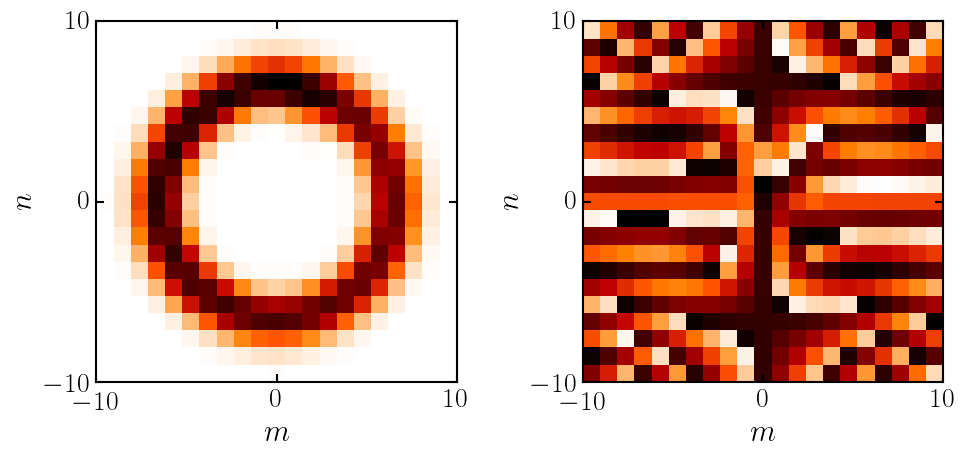

In [15]:
#plot w.f. in real space
f2, axes = plt.subplots(1,2, figsize=(10, 5))
lift(ω -> withfig(()->begin
    axes[1][:cla]()
    axes[2][:cla]()
    axes[1][:imshow](abs2(reshape(BP.getstate(sp, ω), sp.N,sp.N))[st:en,st:en],
                     origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                     extent=[-edge, edge, -edge, edge])
    axes[2][:imshow](angle(reshape(BP.getstate(sp, ω), sp.N,sp.N))[st:en,st:en],
                     origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                     extent=[-edge, edge, -edge, edge])
    for ax in axes
        ax[:set_xlabel](L"$m$")
        ax[:set_ylabel](L"$n$")
        ax[:set_xticks]([-10,0, 10])
        ax[:set_yticks]([-10,0, 10])
    end
    end,f2,clear=false), sω)

In [16]:
#TODO: add momentum space plot

In [17]:
## k = linspace(-π, π, 200)
## Xk = myfft2(X, k,k)
## abs(), angle()

In [18]:
## function extractpath(l1::Int,l2::Int,c1::Int,c2::Int, M::Matrix{Float64})
##     path=Float64[]
##     append!(path, M[l1:l2,c1])
##     append!(path, vec(M[l2,c1:c2])[2:end])
##     append!(path, M[l2:-1:l1,c2][2:end])
##     append!(path, vec(M[l1,c2:-1:c1])[2:end-1])
##     path
## end